# $$ Sentiment \ Forecast \ Analysis $$



### **Objective:** To forecast the future sentiments of the customers of the top category in demand i.e. Digital Music

### **Columns Used:** date, Polarity_Scores, Analysis(to differentiate the sentiments)

### **Model Used:** SARIMA

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
import plotly.express as px
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [ ]:
# Reading the datas
data=pd.read_csv("/content/drive/MyDrive/A_exported_files/A_Sentiment_Analysis_Data.csv")
data1=pd.read_csv("/content/drive/MyDrive/A_exported_files/A_final_data.csv")
data1.head()

In [ ]:
# top 5 rows
data.head()

,reviewText,clean,Polarity_Scores,Subjectivity,Analysis,Analysis1,final_text
0,"The answer, of course, is no. A lot of time ha...",answer course lot time spent whining stuff hul...,0.314583,0.465278,positive,__label__positive,__label__positive answer course lot time spent...
1,"A bit outdated, from a special-effects/technol...",bit outdated specialeffectstechnology pointofv...,0.041879,0.434864,neutral,__label__neutral,__label__neutral bit outdated specialeffectste...
2,Thank you,thank,0.000000,0.000000,neutral,__label__neutral,__label__neutral thank
3,very good,good,0.700000,0.600000,positive,__label__positive,__label__positive good
4,This is good for someone who is trying to make...,good trying decision think help good decision,0.700000,0.600000,positive,__label__positive,__label__positive good trying decision think h...


In [ ]:
# Checking the shape of data
data.shape

(1373582, 7)

In [ ]:
# Checking shape of data
data1.shape

(1373582, 11)

In [ ]:
# Retrieving the reqd columns from 1st dataset
data2=data[['Polarity_Scores','Analysis']]

In [ ]:
# Concating the retrieved coulmns with the 2nd dataset
data3=pd.concat([data1,data2],axis=1)

In [ ]:
data3.head()

,reviewerID,product_id,reviewerName,verified,reviewText,rating,date,summary,brand,category,main_cat,Polarity_Scores,Analysis
0,A2YCGMW0ZKPYZ2,0788602144,Bernard Perusse,True,"The answer, of course, is no. A lot of time ha...",4,2002-07-08,Nostalgia: overrated?,Patrick Adiarte,"CDs & Vinyl,Classic Rock,British Invasion",Movies & TV,0.314583,positive
1,A5N992ESD6UHW,0967680654,Jonny Lee,True,"A bit outdated, from a special-effects/technol...",4,2016-06-21,Would be Nice to See This Effective Concept Re...,Daniel Kruse,"CDs & Vinyl,Christian,Pop & Contemporary",Movies & TV,0.041879,neutral
2,A35L775VMC0BKL,0967680654,Fm,True,Thank you,5,2015-11-18,Five Stars,Daniel Kruse,"CDs & Vinyl,Christian,Pop & Contemporary",Movies & TV,0.000000,neutral
3,A1ZJJKOC38Q622,0967680654,mitzi,True,very good,5,2015-01-21,Five Stars,Daniel Kruse,"CDs & Vinyl,Christian,Pop & Contemporary",Movies & TV,0.700000,positive
4,A2S78BQKIPAMT7,0967680654,faithful,True,This is good for someone who is trying to make...,5,2013-02-02,Escape from Hell,Daniel Kruse,"CDs & Vinyl,Christian,Pop & Contemporary",Movies & TV,0.700000,positive


In [ ]:
# Retrieving only data of Digital music
d1 = data3[data3.main_cat=='Digital Music']
d1.head()

,reviewerID,product_id,reviewerName,verified,reviewText,rating,date,summary,brand,category,main_cat,Polarity_Scores,Analysis
12787,A2M083F1WUVSIC,B0000000MD,Dr Ragan Lorraine Lavorata,True,"ok, he was on my myspace but account is no lon...",4,2014-07-03,Four Stars,Kohachiro Miyata,"CDs & Vinyl,Classic Rock,Album-Oriented Rock (...",Digital Music,0.183333,positive
12788,A10P23RZ3VNNM3,B0000000MD,Richard Critelli,True,yanni always puts on a great show and the musi...,4,2013-02-19,Fine Music,Kohachiro Miyata,"CDs & Vinyl,Classic Rock,Album-Oriented Rock (...",Digital Music,0.547273,positive
12789,A154TZ8EE67MYG,B0000000MD,Kindle Customer,True,This CD is a selection from other CDs he's mad...,4,2011-11-09,In The Mirror,Kohachiro Miyata,"CDs & Vinyl,Classic Rock,Album-Oriented Rock (...",Digital Music,0.700000,positive
12790,A1C4JYAO1VL08Y,B0000000MD,Amazon Customer,True,I really like his music and have seen him in c...,5,2011-06-24,Great CD,Kohachiro Miyata,"CDs & Vinyl,Classic Rock,Album-Oriented Rock (...",Digital Music,0.500000,positive
12791,A1FIN5AVGVDXFF,B000000187,Timothy Ryberg,True,The Endless Summer double LP greatest hits com...,3,2002-03-24,The follow up to Endless Summer,Kohachiro Miyata,"CDs & Vinyl,Classic Rock,Album-Oriented Rock (...",Digital Music,0.223810,positive


In [ ]:
# Retrieving the required columns for time series Analysis
df=d1[['date','Polarity_Scores','Analysis']]

In [ ]:
df.head()

,date,Polarity_Scores,Analysis
12787,2014-07-03,0.183333,positive
12788,2013-02-19,0.547273,positive
12789,2011-11-09,0.700000,positive
12790,2011-06-24,0.500000,positive
12791,2002-03-24,0.223810,positive


In [ ]:
# Checking shape
df.shape

(710091, 3)

In [ ]:
# Checking dtypes
df.dtypes

date                object
Polarity_Scores    float64
Analysis            object
dtype: object

In [ ]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710091 entries, 12787 to 1372795
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             710091 non-null  object 
 1   Polarity_Scores  710091 non-null  float64
 2   Analysis         710091 non-null  object 
dtypes: float64(1), object(2)
memory usage: 21.7+ MB


In [ ]:
# Converting the datatype of date column to datetime format
df['date']=df['date'].astype('datetime64[ns]')

<ipython-input-17-8d8ae3457ea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df['date'].astype('datetime64[ns]')


In [ ]:
# Rechecking dtypes for converted dtype
df.dtypes

date               datetime64[ns]
Polarity_Scores           float64
Analysis                   object
dtype: object

In [ ]:
# Basic cleaning
# Setting Date column as Index

df=df.set_index('date')
df=df.sort_index()

In [ ]:
# Retrieving records from year 2006
df = df['2006-01-01':]

In [ ]:
df.head()

,Polarity_Scores,Analysis
date,,
2006-01-01,0.143016,positive
2006-01-01,0.500000,positive
2006-01-01,0.154722,positive
2006-01-01,0.006667,neutral
2006-01-01,0.147000,positive


In [ ]:
df.tail()

,Polarity_Scores,Analysis
date,,
2018-09-27,0.458333,positive
2018-09-27,1.000000,positive
2018-09-29,0.900000,positive
2018-09-30,0.500000,positive
2018-10-01,0.262500,positive


In [ ]:
# Differentiating the Sentiments using 'Analysis' column
pos_df = df['Polarity_Scores'][df['Analysis']=='positive']
neu_df = df['Polarity_Scores'][df['Analysis']=='neutral']
neg_df = df['Polarity_Scores'][df['Analysis']=='negative']

In [ ]:
pos_df.head()

date
2006-01-01    0.143016
2006-01-01    0.500000
2006-01-01    0.154722
2006-01-01    0.147000
2006-01-01    0.270360
Name: Polarity_Scores, dtype: float64

In [ ]:
# Resampling the data based on Monthly 
pos_df = pos_df.resample('M').mean()
neu_df = neu_df.resample('M').mean()
neg_df = neg_df.resample('M').mean()

In [ ]:
pos_df.head()

date
2006-01-31    0.314304
2006-02-28    0.321730
2006-03-31    0.323155
2006-04-30    0.294525
2006-05-31    0.295224
Freq: M, Name: Polarity_Scores, dtype: float64

In [ ]:
# Checking for missing values 
print('No. of rows containing missing values in pos_df:',pos_df.isnull().sum())
print('No. of rows containing missing values in neg_df:',neg_df.isnull().sum())
print('No. of rows containing missing values in neu_df:',neu_df.isnull().sum())


No. of rows containing missing values in pos_df: 0
No. of rows containing missing values in neg_df: 0
No. of rows containing missing values in neu_df: 0


In [ ]:
# Dropping the rows containing missing values if any
pos_df = pos_df.dropna()
neg_df = neg_df.dropna()
neu_df = neu_df.dropna()

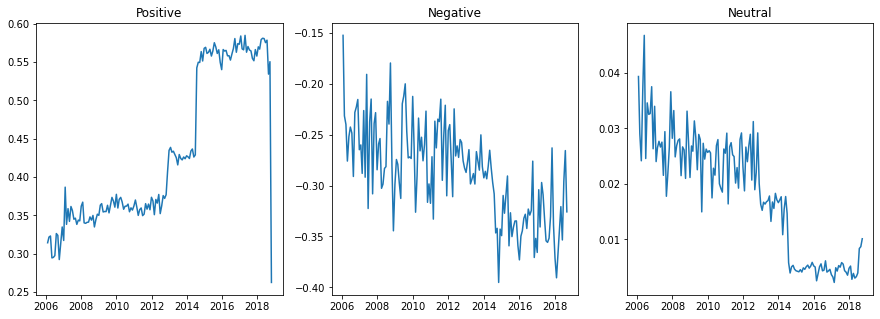

In [ ]:
# Checking plots
fig = plt.figure(figsize=(15, 5))  # specify the figure size
ax1, ax2, ax3 = fig.subplots(1, 3)

# Plot the data
ax1.plot(pos_df)
ax1.set_title("Positive")
ax2.plot(neg_df)
ax2.set_title("Negative")
ax3.plot(neu_df)
ax3.set_title("Neutral")

# Show the plot
plt.show()

## **Decomposition Plots:**

## **Positive Sentiment:**

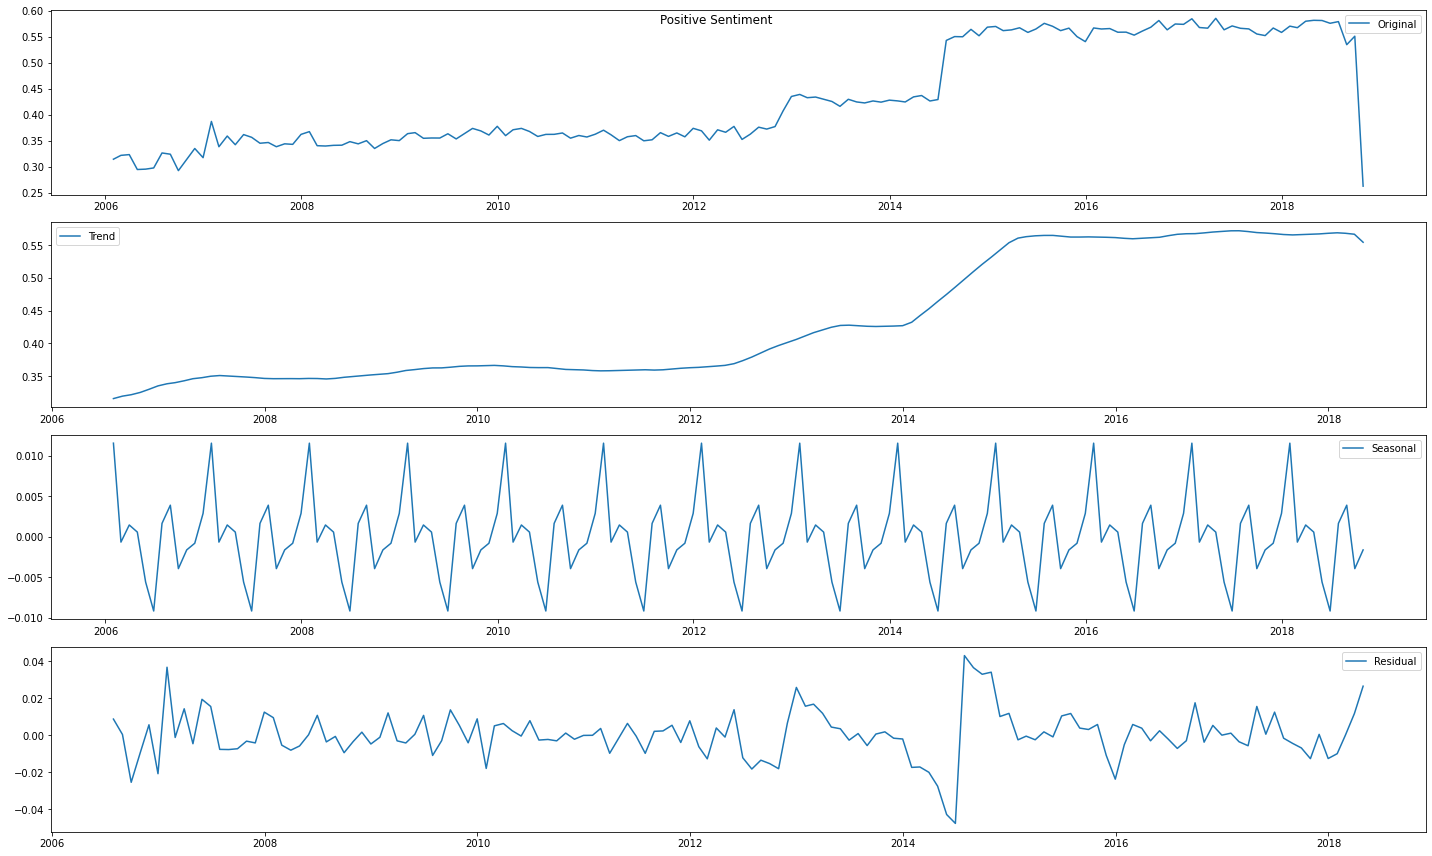

In [ ]:
# Positive Sentiment
decomposition1=seasonal_decompose(pos_df, period=12)
d_trend1=decomposition1.trend
d_seasonal1=decomposition1.seasonal
d_residual1=decomposition1.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))
plt.suptitle('Positive Sentiment')

plt.subplot(411)
plt.plot(pos_df,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend1,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal1,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual1,label='Residual') # irregularity
plt.legend(loc='best')

plt.tight_layout()

In [ ]:
import plotly.express as ps

ps.line(d_seasonal1)

* Both Trend and Seasonality are present for Positive Sentiment graph
* There are regular peaks at an interval of 1 year i.e. 12 months.

## **Negative Sentiment**

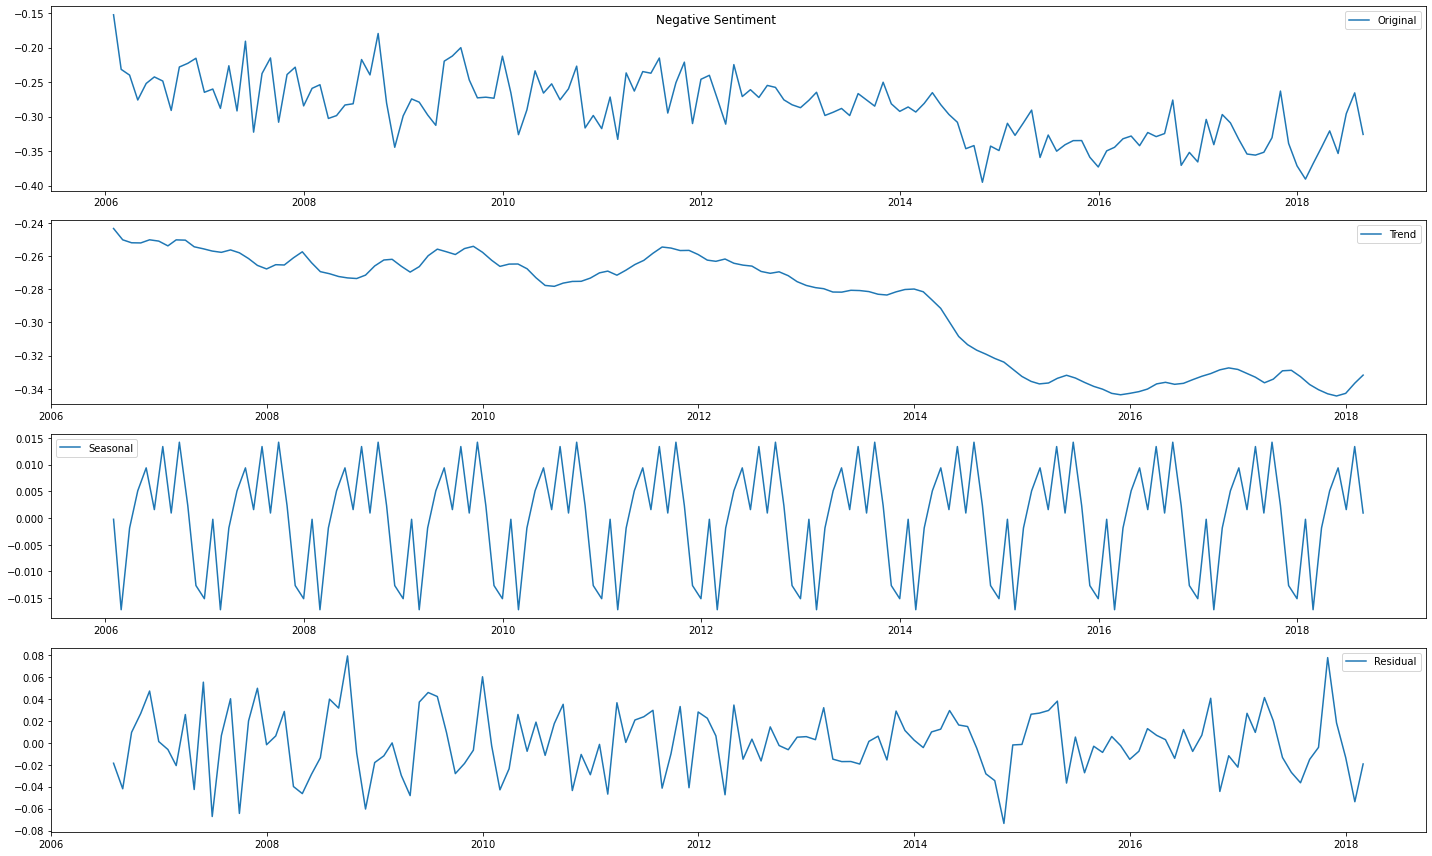

In [ ]:
# Negative Sentiment
decomposition1=seasonal_decompose(neg_df, period=12)
d_trend1=decomposition1.trend
d_seasonal1=decomposition1.seasonal
d_residual1=decomposition1.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))
plt.suptitle('Negative Sentiment')

plt.subplot(411)
plt.plot(neg_df,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend1,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal1,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual1,label='Residual') # irregularity
plt.legend(loc='best')

plt.tight_layout()

In [ ]:
import plotly.express as ps

ps.line(d_seasonal1)

* Both Trend and Seasonality are present for Negative Sentiment graph
* There are regular peaks at an interval of 1 year i.e. 12 months.

## **Neutral Sentiment**

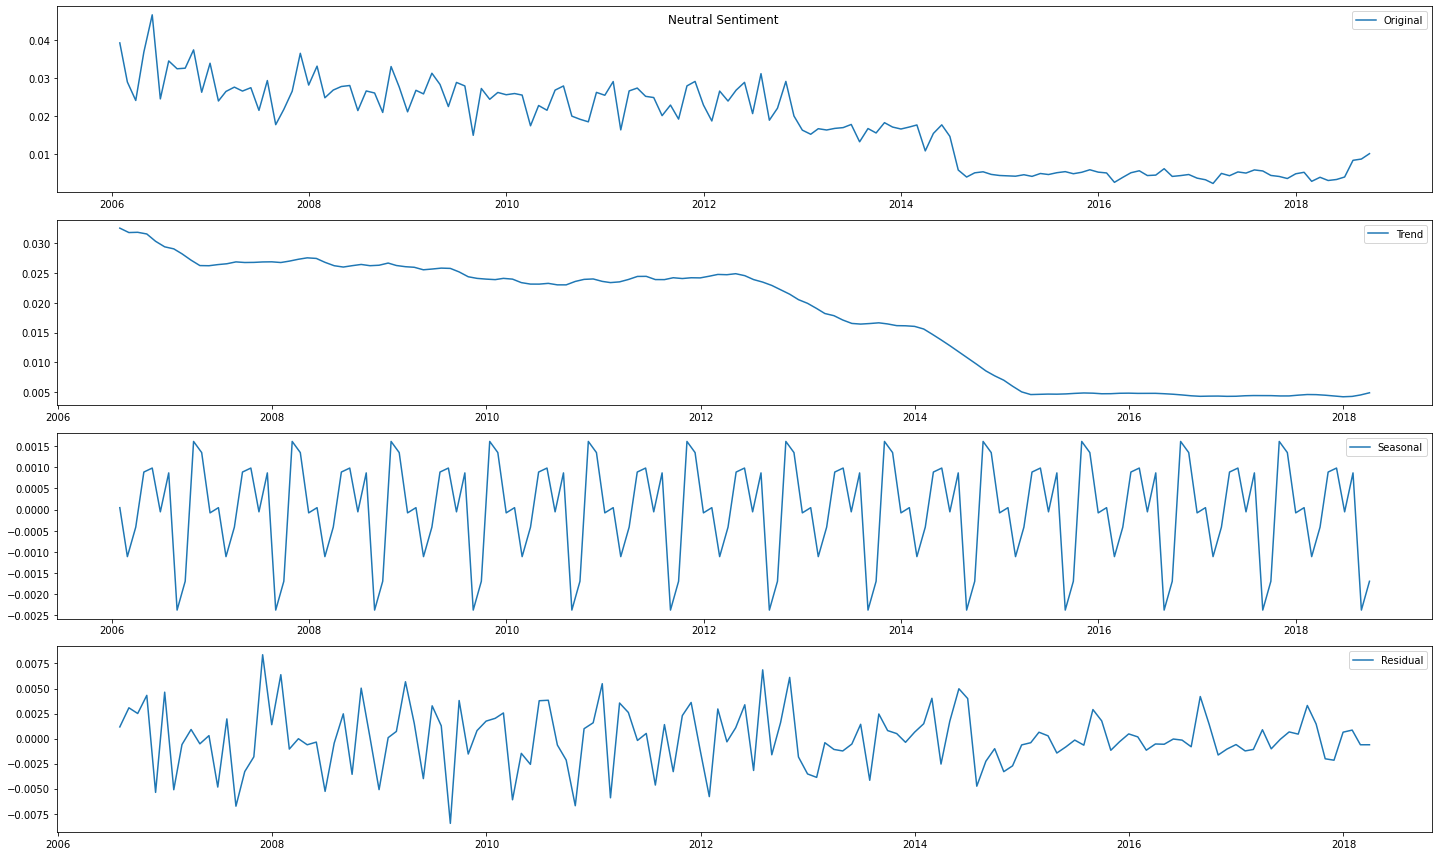

In [ ]:
decomposition1=seasonal_decompose(neu_df, period=12)
d_trend1=decomposition1.trend
d_seasonal1=decomposition1.seasonal
d_residual1=decomposition1.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))
plt.suptitle('Neutral Sentiment')

plt.subplot(411)
plt.plot(neu_df,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend1,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal1,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual1,label='Residual') # irregularity
plt.legend(loc='best')

plt.tight_layout()

In [ ]:
import plotly.express as ps

ps.line(d_seasonal1)

* Both Trend and Seasonality are present for Neutral Sentiment graph
* There are regular peaks at an interval of 1 year i.e. 12 months.

## **Stationarity Check**

In [ ]:
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg 

In [ ]:
# function call
print("Neutral--->",checkStationarity(neu_df))
print("Negative--->",checkStationarity(neg_df))
print("Positive--->",checkStationarity(pos_df))

0.42852201484144403
Neutral---> pvalue=0.42852201484144403. Data is not Stationary. Make the data stationary before model building
0.6835524437178548
Negative---> pvalue=0.6835524437178548. Data is not Stationary. Make the data stationary before model building
0.5406096535147609
Positive---> pvalue=0.5406096535147609. Data is not Stationary. Make the data stationary before model building


The Data is not Stationary for all three sentiments so we have to differenciate the data inorder to make it Stationary.

In [ ]:
# difference the data by 1 
diff_neu_df = neu_df - neu_df.shift(1)
diff_neg_df = neg_df - neg_df.shift(1)
diff_pos_df = pos_df - pos_df.shift(1)


In [ ]:
# Dropping rows containing null values from the differenced data
diff_neu_df.dropna(inplace = True)
diff_neg_df.dropna(inplace = True)
diff_pos_df.dropna(inplace = True)

In [ ]:
# Checking if the differenced data is stationary
print("Neutral--->",checkStationarity(diff_neu_df))
print("Negative--->",checkStationarity(diff_neg_df))
print("Positive--->",checkStationarity(diff_pos_df))

1.7804103657725503e-19
Neutral---> pvalue=1.7804103657725503e-19. Data is Stationary. Proceed to model building
2.4465293526490757e-09
Negative---> pvalue=2.4465293526490757e-09. Data is Stationary. Proceed to model building
0.00016863883218725472
Positive---> pvalue=0.00016863883218725472. Data is Stationary. Proceed to model building


## **Forecast of Positive Sentiment**

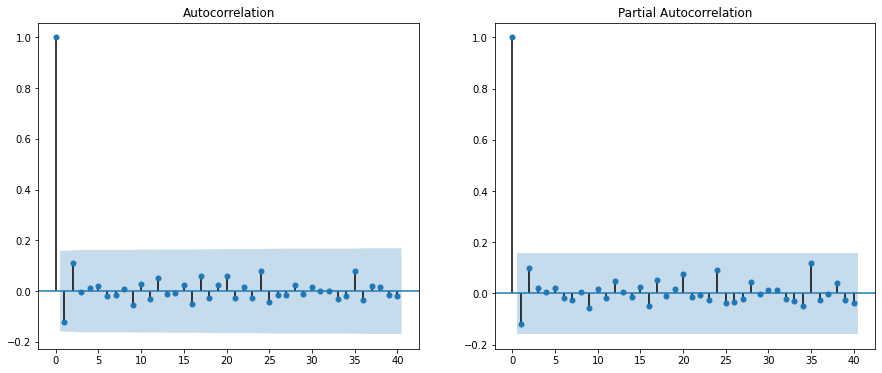

In [ ]:
# Plotting acf,pacf graphs
r=1;c=2
fig,ax=plt.subplots(r,c,figsize=(15,6))
plot_acf(diff_pos_df,lags=40,ax=ax[0])
plot_pacf(diff_pos_df,lags=40,ax=ax[1])
plt.show()

In [ ]:
# Storing p,q,d values in list
li=[]
for p in range(3):
    for q in range(3):
        li.append((p,1,q))
        
li

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [ ]:
# Iterating the model with different p,q values

model = []
for p,d,q in li:
    m = sm.tsa.statespace.SARIMAX(pos_df,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
    model.append(m)
    
model

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
# Error Calculations for those p,q values

aic = []
bic = []
MSE = []
RMSE = []

for i in model:
    aic.append(i.aic)           # calculating aic
    bic.append(i.bic)           # calculating bic
    forecast = i.fittedvalues
    mse = mean_squared_error(pos_df, forecast) #calculating mse
    rmse= mean_squared_error(pos_df, forecast,squared= False)#calculating rmse
    MSE.append(mse)
    RMSE.append(rmse)

In [ ]:
# Listing AIC,BIC,MSE and RMSE values
a= pd.DataFrame({'AIC':aic,'BIC':bic,'MSE':MSE,'RMSE':RMSE},index = li) 
a.sort_values(by='RMSE',ascending=True)

,AIC,BIC,MSE,RMSE
"(1, 1, 2)",-582.740720,-562.099400,0.001490,0.038594
"(0, 1, 2)",-585.584640,-570.840841,0.001499,0.038713
"(2, 1, 1)",-581.778724,-561.137405,0.001501,0.038746
"(2, 1, 0)",-585.715738,-570.971939,0.001502,0.038750
"(2, 1, 2)",-577.682674,-551.143835,0.001502,0.038754
"(1, 1, 1)",-585.101656,-570.357856,0.001504,0.038786
"(1, 1, 0)",-586.889624,-578.043344,0.001515,0.038926
"(0, 1, 1)",-583.950934,-575.104655,0.001529,0.039107
"(0, 1, 0)",-571.449336,-568.500576,0.001635,0.040435


In [ ]:
# Finding the p,q values that scored least errors
p1,d1,q1=a['AIC'].idxmin()
p2,d2,q2=a['BIC'].idxmin()
p3,d3,q3=a['RMSE'].idxmin()

print('min_aic:',a['AIC'].idxmin())
print('min_bic:',a['BIC'].idxmin())
print('min_mse:',a['MSE'].idxmin())
print('min_rmse:',a['RMSE'].idxmin())

min_aic: (1, 1, 0)
min_bic: (1, 1, 0)
min_mse: (1, 1, 2)
min_rmse: (1, 1, 2)


In [ ]:
# Checking model for the least scores
# least aic,bic score
mod_aic = sm.tsa.statespace.SARIMAX(pos_df,order=(p1,d1,q1),seasonal_order=(p1,d1,q1,12)).fit()
predictt1 = mod_aic.fittedvalues
forecastt1 = mod_aic.forecast(24)
rmse_aic1 = mean_squared_error(pos_df,predictt1,squared= False)

# least bic score
mod_bic = sm.tsa.statespace.SARIMAX(pos_df,order=(p2,d2,q2),seasonal_order=(p2,d2,q2,12)).fit()
predictt2 = mod_bic.fittedvalues
forecastt2 = mod_bic.forecast(100)
rmse_bic1 = mean_squared_error(pos_df,predictt2,squared= False)


# least mse,rmse score
model_1=sm.tsa.statespace.SARIMAX(pos_df,order=(p3,d3,q3),seasonal_order=(p3,d3,q3,12)).fit()
predictt3 = model_1.fittedvalues
forecast_sarima1 = model_1.forecast(24)
rmse_2 = mean_squared_error(pos_df,predictt3,squared= False)

# Printing error scores
print('RMSE of model with least aic,bic score:',rmse_aic1)
print('RMSE of model with least bic score:',rmse_bic1)
print('RMSE of model with least mse,rmse score:',rmse_2)

RMSE of model with least aic,bic score: 0.038926466124459436
RMSE of model with least bic score: 0.038926466124459436
RMSE of model with least mse,rmse score: 0.038594316402889496


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
# Predicted values
predictt3

date
2006-01-31    0.000000
2006-02-28    0.314304
2006-03-31    0.321730
2006-04-30    0.323155
2006-05-31    0.294525
                ...   
2018-06-30    0.581359
2018-07-31    0.596568
2018-08-31    0.585076
2018-09-30    0.539385
2018-10-31    0.525493
Freq: M, Length: 154, dtype: float64

In [ ]:
# Forecasted values
forecast_sarima1

2018-11-30    0.341500
2018-12-31    0.252491
2019-01-31    0.238034
2019-02-28    0.218895
2019-03-31    0.219907
2019-04-30    0.225636
2019-05-31    0.217785
2019-06-30    0.217366
2019-07-31    0.217896
2019-08-31    0.198501
2019-09-30    0.203822
2019-10-31    0.077539
2019-11-30    0.112925
2019-12-31    0.072717
2020-01-31    0.070704
2020-02-29    0.060767
2020-03-31    0.066546
2020-04-30    0.069915
2020-05-31    0.063546
2020-06-30    0.061649
2020-07-31    0.071391
2020-08-31    0.050713
2020-09-30    0.057324
2020-10-31   -0.086608
Freq: M, Name: predicted_mean, dtype: float64

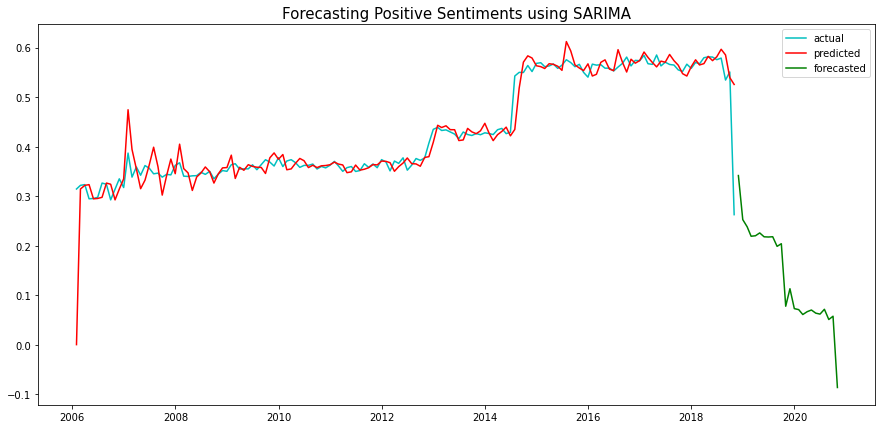

In [ ]:
# Plotting the forecasted vaues 
plt.figure(figsize=(15,7))
plt.plot(pos_df,label='actual',c='c')
plt.plot(predictt3,label='predicted',c='r')
plt.plot(forecast_sarima1,c='g',label='forecasted')
plt.legend()
plt.title('Forecasting Positive Sentiments using SARIMA',fontsize=15)
plt.show()

## **Forecast of Negative Sentiment**

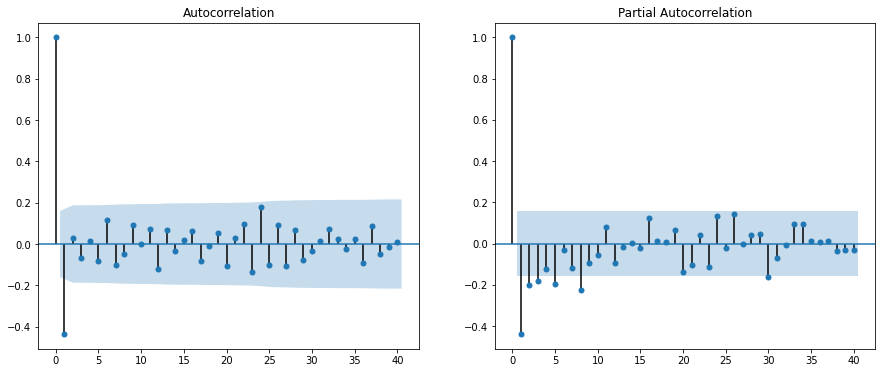

In [ ]:
# plotting the acf, pacf graphs
r=1;c=2
fig,ax=plt.subplots(r,c,figsize=(15,6))
plot_acf(diff_neg_df,lags=40,ax=ax[0])
plot_pacf(diff_neg_df,lags=40,ax=ax[1])
plt.show()

In [ ]:
# Storing p,q,d values in list
li=[]
for p in range(6):
    for q in range(2):
        li.append((p,1,q))
        
li

[(0, 1, 0),
 (0, 1, 1),
 (1, 1, 0),
 (1, 1, 1),
 (2, 1, 0),
 (2, 1, 1),
 (3, 1, 0),
 (3, 1, 1),
 (4, 1, 0),
 (4, 1, 1),
 (5, 1, 0),
 (5, 1, 1)]

In [ ]:
# Iterating the model for different p,q values

model = []
for p,d,q in li:
    m = sm.tsa.statespace.SARIMAX(neg_df,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
    model.append(m)
    
model

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
# Error Calculations of the models for different p,q

aic = []
bic = []
MSE = []
RMSE = []

for i in model:
    aic.append(i.aic)           # calculating aic
    bic.append(i.bic)           # calculating bic
    forecast = i.fittedvalues
    mse = mean_squared_error(neg_df, forecast) #calculating mse
    rmse= mean_squared_error(neg_df, forecast,squared= False)#calculating rmse
    MSE.append(mse)
    RMSE.append(rmse)

In [ ]:
# Listing the Errors of the model for different p,q values
a= pd.DataFrame({'AIC':aic,'BIC':bic,'MSE':MSE,'RMSE':RMSE},index = li) 
a.sort_values(by='RMSE',ascending=True)

,AIC,BIC,MSE,RMSE
"(3, 1, 1)",-508.899740,-482.489474,0.001650,0.040626
"(2, 1, 1)",-510.825221,-490.283903,0.001656,0.040692
"(4, 1, 1)",-503.052822,-470.773609,0.001662,0.040768
"(5, 1, 1)",-499.898270,-461.750109,0.001663,0.040778
"(1, 1, 1)",-511.967386,-497.295016,0.001683,0.041023
"(0, 1, 1)",-510.926871,-502.123449,0.001717,0.041431
"(5, 1, 0)",-496.286295,-464.007081,0.001721,0.041479
"(4, 1, 0)",-493.128103,-466.717838,0.001769,0.042061
"(3, 1, 0)",-491.185832,-470.644515,0.001835,0.042840
"(2, 1, 0)",-481.229024,-466.556654,0.001939,0.044038


In [ ]:
# Optimum p,q values for least errors
p1,d1,q1=a['AIC'].idxmin()
p2,d2,q2=a['BIC'].idxmin()
p3,d3,q3=a['RMSE'].idxmin()

print('min_aic:',a['AIC'].idxmin())
print('min_bic:',a['BIC'].idxmin())
print('min_mse:',a['MSE'].idxmin())
print('min_rmse:',a['RMSE'].idxmin())

min_aic: (1, 1, 1)
min_bic: (0, 1, 1)
min_mse: (3, 1, 1)
min_rmse: (3, 1, 1)


In [ ]:
# Checking model for the least scores
# least aic score
mod_aic = sm.tsa.statespace.SARIMAX(neg_df,order=(p1,d1,q1),seasonal_order=(p1,d1,q1,12)).fit()
predictt1 = mod_aic.fittedvalues
forecastt1 = mod_aic.forecast(24)
rmse_aic1 = mean_squared_error(neg_df,predictt1,squared= False)

# least bic score
mod_bic = sm.tsa.statespace.SARIMAX(neg_df,order=(p2,d2,q2),seasonal_order=(p2,d2,q2,12)).fit()
predictt2 = mod_bic.fittedvalues
forecastt2 = mod_bic.forecast(24)
rmse_bic1 = mean_squared_error(neg_df,predictt2,squared= False)


# least mse,rmse score
model_1=sm.tsa.statespace.SARIMAX(neg_df,order=(p3,d3,q3),seasonal_order=(p3,d3,q3,12)).fit()
predictt23 = model_1.fittedvalues
forecast_sarima2 = model_1.forecast(24)
rmse_22 = mean_squared_error(neg_df,predictt23,squared= False)

# Printing error scores
print('RMSE of model with least aic,bic score:',rmse_aic1)
print('RMSE of model with least bic score:',rmse_bic1)
print('RMSE of model with least mse,rmse score:',rmse_22)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RMSE of model with least aic,bic score: 0.04102264233813048
RMSE of model with least bic score: 0.041431361089005914
RMSE of model with least mse,rmse score: 0.04062553015752655


In [ ]:
#Predicted values
predictt23

date
2006-01-31    0.000000
2006-02-28   -0.152468
2006-03-31   -0.231542
2006-04-30   -0.239901
2006-05-31   -0.275926
                ...   
2018-04-30   -0.334999
2018-05-31   -0.335576
2018-06-30   -0.345844
2018-07-31   -0.325866
2018-08-31   -0.325752
Freq: M, Length: 152, dtype: float64

In [ ]:
# Forecasted values
forecast_sarima2

2018-09-30   -0.317257
2018-10-31   -0.357484
2018-11-30   -0.357613
2018-12-31   -0.361927
2019-01-31   -0.332370
2019-02-28   -0.354259
2019-03-31   -0.333752
2019-04-30   -0.325033
2019-05-31   -0.348372
2019-06-30   -0.348382
2019-07-31   -0.346752
2019-08-31   -0.358961
2019-09-30   -0.350103
2019-10-31   -0.334368
2019-11-30   -0.365474
2019-12-31   -0.377142
2020-01-31   -0.370960
2020-02-29   -0.371087
2020-03-31   -0.358016
2020-04-30   -0.340588
2020-05-31   -0.364087
2020-06-30   -0.338793
2020-07-31   -0.330455
2020-08-31   -0.356100
Freq: M, Name: predicted_mean, dtype: float64

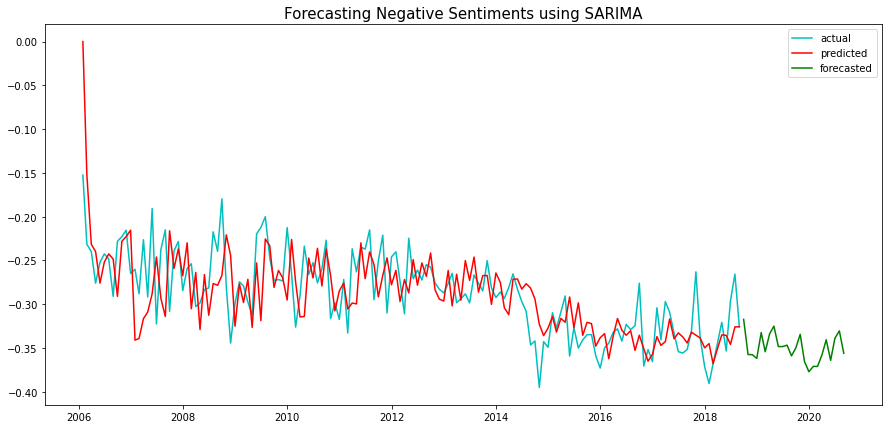

In [ ]:
# Plotting the forecasted values
plt.figure(figsize=(15,7))
plt.plot(neg_df,label='actual',c='c')
plt.plot(predictt23,label='predicted',c='r')
plt.plot(forecast_sarima2,c='g',label='forecasted')
plt.legend()
plt.title('Forecasting Negative Sentiments using SARIMA',fontsize=15)
plt.show()

## **Forecast of Neutral Sentiments**

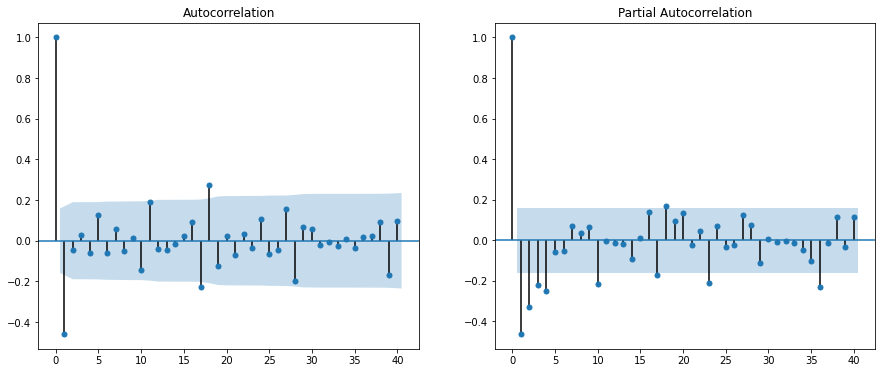

In [ ]:
# Plotting acf,pacf graphs
r=1;c=2
fig,ax=plt.subplots(r,c,figsize=(15,6))
plot_acf(diff_neu_df,lags=40,ax=ax[0])
plot_pacf(diff_neu_df,lags=40,ax=ax[1])
plt.show()

In [ ]:
# Storing p,q,d values in list
li=[]
for p in range(8):
    for q in range(3):
        li.append((p,1,q))
        
li

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2)]

In [ ]:
# Itering model with different p,q values

model = []
for p,d,q in li:
    m = sm.tsa.statespace.SARIMAX(neu_df,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
    model.append(m)
    
model

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dis

In [ ]:
# Error Calculations of the models for different p,q

aic = []
bic = []
MSE = []
RMSE = []

for i in model:
    aic.append(i.aic)           # calculating aic
    bic.append(i.bic)           # calculating bic
    forecast = i.fittedvalues
    mse = mean_squared_error(neu_df, forecast) #calculating mse
    rmse= mean_squared_error(neu_df, forecast,squared= False)#calculating rmse
    MSE.append(mse)
    RMSE.append(rmse)

In [ ]:
# Listing the Errors of the model for different p,q values
a= pd.DataFrame({'AIC':aic,'BIC':bic,'MSE':MSE,'RMSE':RMSE},index = li) 
a.sort_values(by='RMSE',ascending=True)

,AIC,BIC,MSE,RMSE
"(7, 1, 0)",-1089.802611,-1045.677975,0.000044,0.006651
"(7, 1, 1)",-1084.761132,-1034.753210,0.000045,0.006676
"(6, 1, 1)",-1086.492488,-1042.367851,0.000045,0.006682
"(6, 1, 2)",-1081.008651,-1031.000730,0.000045,0.006689
"(4, 1, 2)",-1088.700177,-1050.458825,0.000045,0.006691
"(7, 1, 2)",-1079.762567,-1023.871361,0.000045,0.006692
"(5, 1, 2)",-1084.671885,-1040.547249,0.000045,0.006705
"(0, 1, 1)",-1102.747289,-1093.922362,0.000045,0.006729
"(5, 1, 0)",-1091.328507,-1058.970440,0.000046,0.006752
"(6, 1, 0)",-1079.128396,-1040.887045,0.000046,0.006756


In [ ]:
# Optimum p,q values for least errors
p1,d1,q1=a['AIC'].idxmin()
p2,d2,q2=a['BIC'].idxmin()
p3,d3,q3=a['RMSE'].idxmin()

print('min_aic:',a['AIC'].idxmin())
print('min_bic:',a['BIC'].idxmin())
print('min_mse:',a['MSE'].idxmin())
print('min_rmse:',a['RMSE'].idxmin())

min_aic: (0, 1, 1)
min_bic: (0, 1, 1)
min_mse: (7, 1, 0)
min_rmse: (7, 1, 0)


In [ ]:
# Checking model for the least scores
# least aic score
mod_aic = sm.tsa.statespace.SARIMAX(neu_df,order=(p1,d1,q1),seasonal_order=(p1,d1,q1,12)).fit()
predictt1 = mod_aic.fittedvalues
forecastt1 = mod_aic.forecast(24)
rmse_aic1 = mean_squared_error(neu_df,predictt1,squared= False)

# least bic score
mod_bic = sm.tsa.statespace.SARIMAX(neu_df,order=(p2,d2,q2),seasonal_order=(p2,d2,q2,12)).fit()
predictt2 = mod_bic.fittedvalues
forecastt2 = mod_bic.forecast(24)
rmse_bic1 = mean_squared_error(neu_df,predictt2,squared= False)


# least mse,rmse score
model_1=sm.tsa.statespace.SARIMAX(neu_df,order=(p3,d3,q3),seasonal_order=(p3,d3,q3,12)).fit()
predictt33 = model_1.fittedvalues
forecast_sarima3 = model_1.forecast(24)
rmse_32 = mean_squared_error(neu_df,predictt33,squared= False)

# Printing error scores
print('RMSE of model with least aic,bic score:',rmse_aic1)
print('RMSE of model with least bic score:',rmse_bic1)
print('RMSE of model with least mse,rmse score:',rmse_32)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RMSE of model with least aic,bic score: 0.0067290745616217645
RMSE of model with least bic score: 0.0067290745616217645
RMSE of model with least mse,rmse score: 0.0066505198228803955


In [ ]:
# Predicted values
predictt33

date
2006-01-31    0.000000
2006-02-28    0.039331
2006-03-31    0.029018
2006-04-30    0.024152
2006-05-31    0.036922
                ...   
2018-05-31    0.004943
2018-06-30    0.004093
2018-07-31    0.003412
2018-08-31    0.004143
2018-09-30    0.003558
Freq: M, Length: 153, dtype: float64

In [ ]:
# forecasted values
forecast_sarima3

2018-10-31    0.006737
2018-11-30    0.007695
2018-12-31    0.008126
2019-01-31    0.008290
2019-02-28    0.006387
2019-03-31    0.006742
2019-04-30    0.008117
2019-05-31    0.008529
2019-06-30    0.007732
2019-07-31    0.007023
2019-08-31    0.006977
2019-09-30    0.006462
2019-10-31    0.007233
2019-11-30    0.007142
2019-12-31    0.006418
2020-01-31    0.005909
2020-02-29    0.005705
2020-03-31    0.005853
2020-04-30    0.006404
2020-05-31    0.007177
2020-06-30    0.005935
2020-07-31    0.008057
2020-08-31    0.006721
2020-09-30    0.007113
Freq: M, Name: predicted_mean, dtype: float64

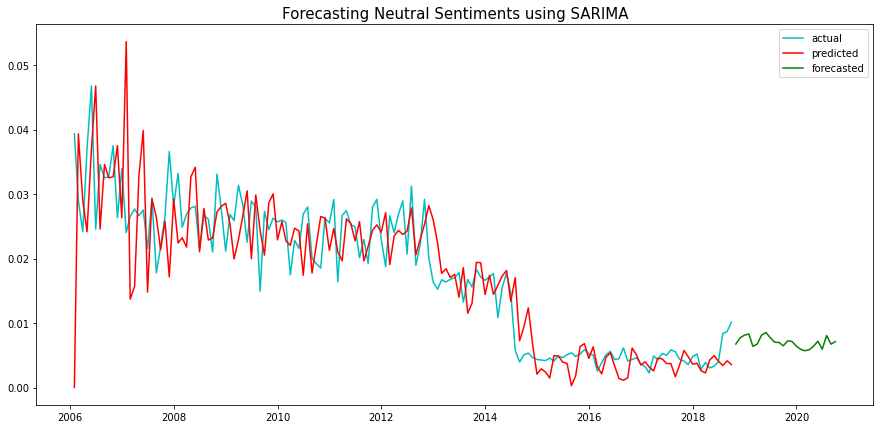

In [ ]:
# Plotting the forecasted values
plt.figure(figsize=(15,7))
plt.plot(neu_df,label='actual',c='c')
plt.plot(predictt33,label='predicted',c='r')
plt.plot(forecast_sarima3,c='g',label='forecasted')
plt.legend()
plt.title('Forecasting Neutral Sentiments using SARIMA',fontsize=15)
plt.show()

## **Comparison of Graphs of Sentiments**

Text(0, 0.5, 'polarity scores')

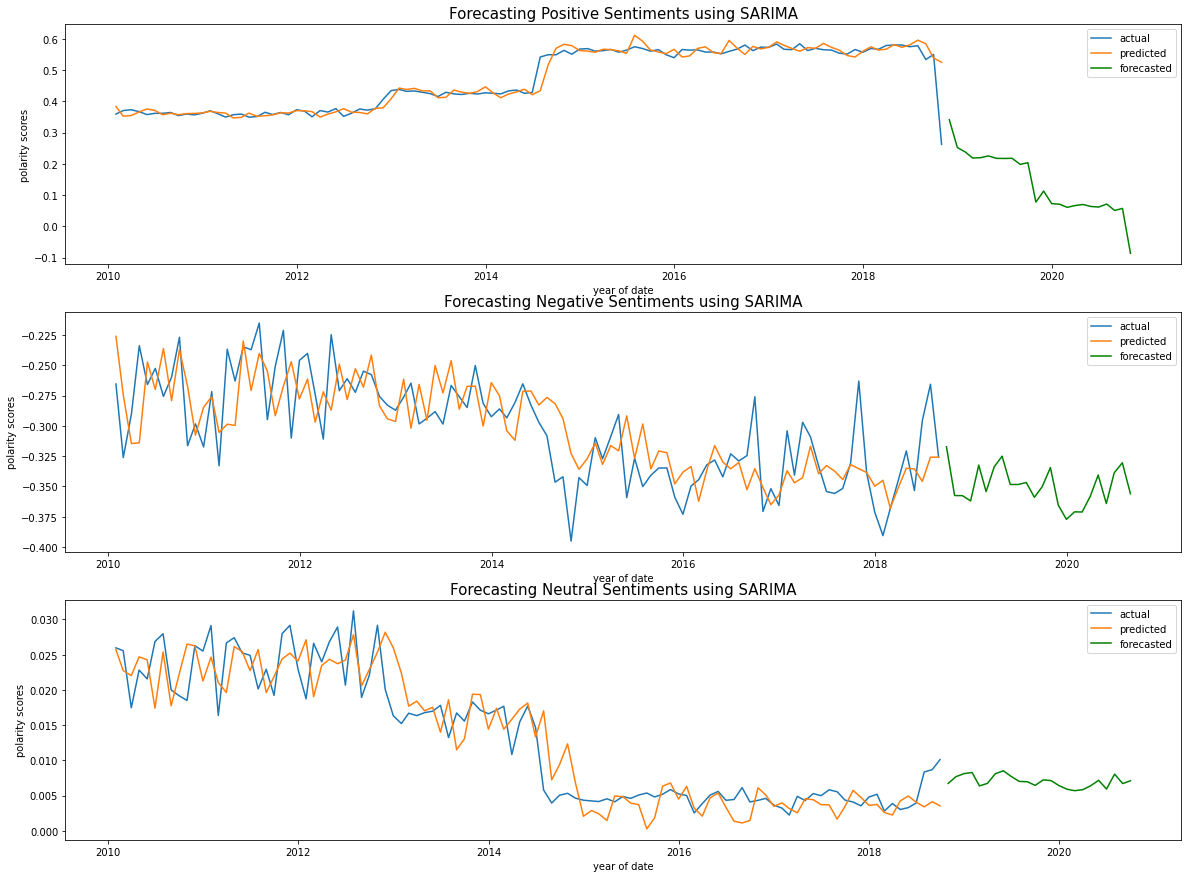

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

plt.subplot(311)
plt.plot(pos_df['2010-01-03':],label='actual')
plt.plot(predictt3['2010-01-03':],label='predicted')
plt.plot(forecast_sarima1,c='g',label='forecasted')
plt.title('Forecasting Positive Sentiments using SARIMA',fontsize=15)
plt.xlabel('year of date')
plt.ylabel('polarity scores')
plt.legend()

plt.subplot(312)
plt.plot(neg_df['2010-01-03':],label='actual')
plt.plot(predictt23['2010-01-03':],label='predicted')
plt.plot(forecast_sarima2,c='g',label='forecasted')
plt.title('Forecasting Negative Sentiments using SARIMA',fontsize=15)
plt.xlabel('year of date')
plt.ylabel('polarity scores')
plt.legend()

plt.subplot(313)
plt.plot(neu_df['2010-01-03':],label='actual')
plt.plot(predictt33['2010-01-03':],label='predicted')
plt.plot(forecast_sarima3,c='g',label='forecasted')
plt.legend()
plt.title('Forecasting Neutral Sentiments using SARIMA',fontsize=15)
plt.xlabel('year of date')
plt.ylabel('polarity scores')

## **Error Comparison**

In [ ]:
errors = pd.read_csv('/content/drive/MyDrive/Capstone Project/final_errors_ts2.csv')

In [ ]:
t = pd.DataFrame([rmse_2,rmse_22,rmse_32],columns=['SARIMA'])
t1 = pd.concat([errors,t],axis=1)

In [ ]:
t1[['Triple Exp smoothing','SARIMA']]

,Triple Exp smoothing,SARIMA
0,0.029172,0.049808
1,0.048325,0.078603
2,0.004390,0.005186


### **Interpretations**:
On Comparing the error values and forecasted graphs,there is no much difference in rmse values of Triple Exponential Smoothening and SARIMA model

**From the future forecasts for 24 months (2 years) observed from the graphs of SARIMA model**

- The Positive sentiment seems to be decreasing over the period.
- The Negative sentiment seems to be neither increasing nor decreasing over the period.
- The Neutral sentiment seems to be neither increasing nor decreasing over the period.

## We compared with other models, the better predictions happened in SARIMA model. SARIMA model is best for this analysis.

* And links to access other models is given below

[comparision models](https://drive.google.com/file/d/1WIefDG0MryKz9WmvUDcIqDJZpH65SFiu/view?usp=share_link)

[errors](https://drive.google.com/file/d/1yKNOS_0VSUpkvlI2eMWNdP850wlnQ9W_/view?usp=share_link)